## Objective:
#### The objective of this project is to analyze customer purchasing behavior using the Customer Personality Analysis dataset. Through data preprocessing, exploratory data analysis (EDA), and statistical insights, we aim to:

- Clean and preprocess the dataset by handling missing values, outliers, and encoding categorical variables.
- Identify key spending patterns across different product categories (Wines, Meat, Fish, etc.).
- Analyze customer engagement with marketing campaigns, answering questions such as:
    - Which product category (Wines, Meat, Fish, etc.) is the most popular?
    - Are there customers with very high spending despite low income?
    - How many customers responded to at least one campaign?
    - Which campaigns were the most successful?
    - Are customers who buy more also more likely to accept a campaign?
    
- Segment customers based on their spending habits and demographics (e.g., age, marital status).

    - Examine spending behavior to understand:

    - Do older customers spend differently than younger ones?

    - Is there a relationship between marital status and spending habits?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign (1).csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Understanding data

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Missing Values

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
(df['Income'].isnull().sum()/len(df))*100

1.0714285714285714

<AxesSubplot:xlabel='Income', ylabel='Count'>

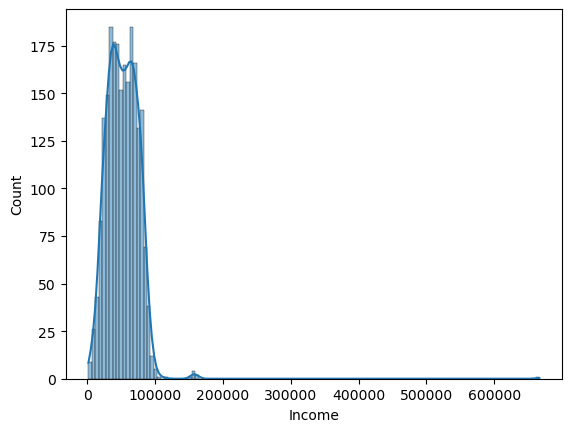

In [11]:
sns.histplot(df['Income'],kde=True)

In [12]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [13]:
df.Income.isnull().sum()

0

### Duplicates

In [14]:
df.duplicated().sum()

0

In [15]:
df['ID'].duplicated().sum()

0

### Outliers

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year_Birth'>

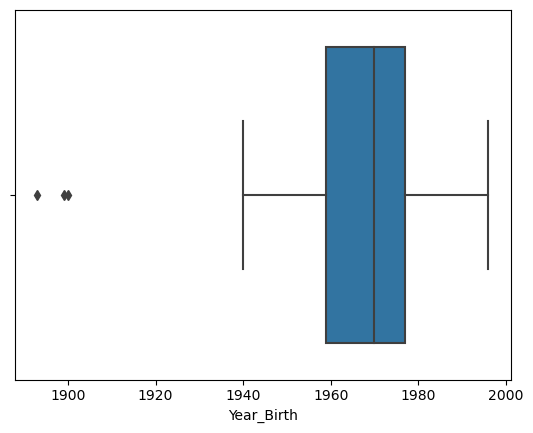

In [16]:
sns.boxplot(df['Year_Birth'])

In [17]:
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
outlier = df[(df['Year_Birth']<lower)|(df['Year_Birth']>upper)]
print(outlier)

        ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
192  26-09-2013       99        15  ...                  5             0   
239  17-05-2014       23         8  ...                  4             0   
339  26-09-2013       36       755  ...                  1             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
192             0             0             0             0         1   
239             0             0             0             0         0   
339             0             1             0             0         0   

     Z_CostContact  Z_Revenue  Response  
192              3         11         0  
2

- Seems as error

In [18]:
df = df[(df['Year_Birth']>=lower) & (df['Year_Birth']<=upper)]

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year_Birth'>

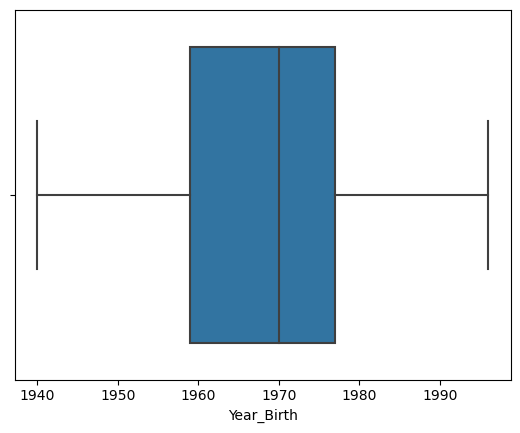

In [19]:
sns.boxplot(df['Year_Birth'])

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

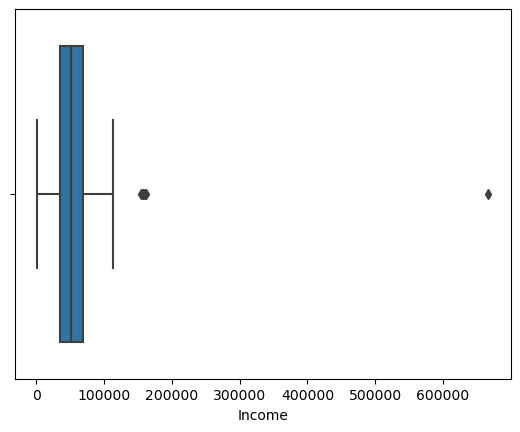

In [20]:
sns.boxplot(df['Income'])

In [21]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
outlier = df[(df['Income']<lower)|(df['Income']>upper)]
print(outlier)

         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
164          1  01-03-2014       98        20  ...                  0   
617          1  03-06-2013       31        85  ...                  1   
655          0  07-02-2014       81         1  ...                  0   
687          0  04-08-2012       21        55  ...

In [22]:
print(df['Income'].sort_values(ascending=False).head(10))  # Top 10 incomes

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64


In [23]:
df[df['Income']==666666]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [24]:
print(df['Income'].quantile([0.90, 0.95, 0.99]))  # Check top 10%, 5%, 1%

0.90    79776.60
0.95    83957.00
0.99    94440.32
Name: Income, dtype: float64


-  666,666 is WAY above even the top 1% income (94,440.32)!
- 666,666 is 7 times higher than the highest 1% threshold—this strongly suggests it’s an outlier or error.

#### Treat It as an Outlier & Cap It at the 99th Percentile

In [25]:
upper_limit = df['Income'].quantile(0.99)
df.loc[df['Income'] > upper_limit, 'Income'] = upper_limit

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

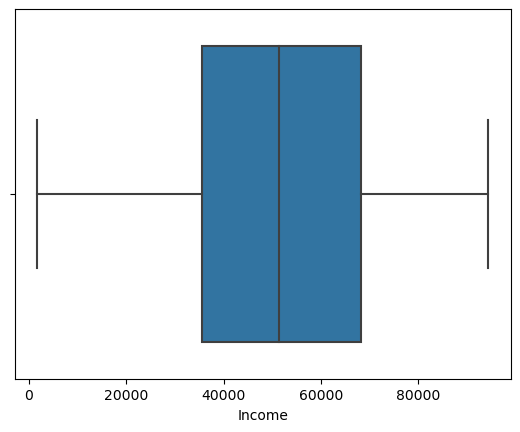

In [26]:
sns.boxplot(df['Income'])

In [27]:
### 

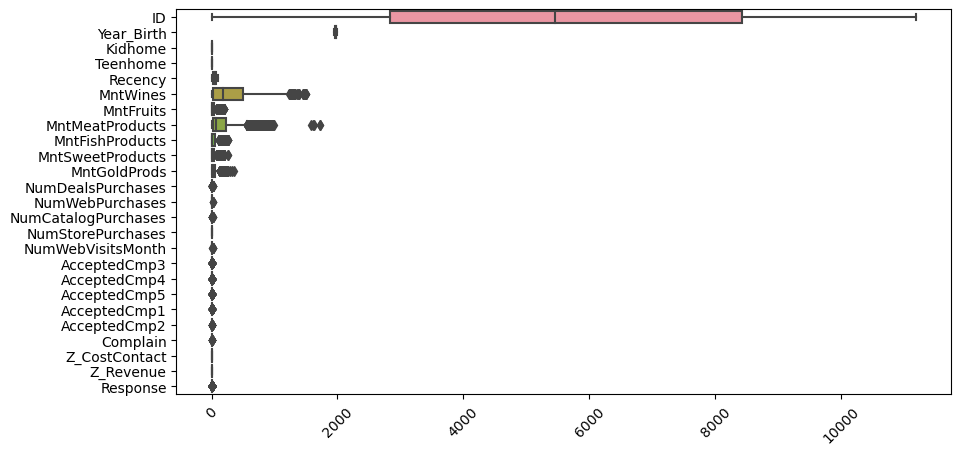

In [28]:
int_col = df.select_dtypes(include=['int64']).columns
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df[int_col],  orient='h')
plt.show()

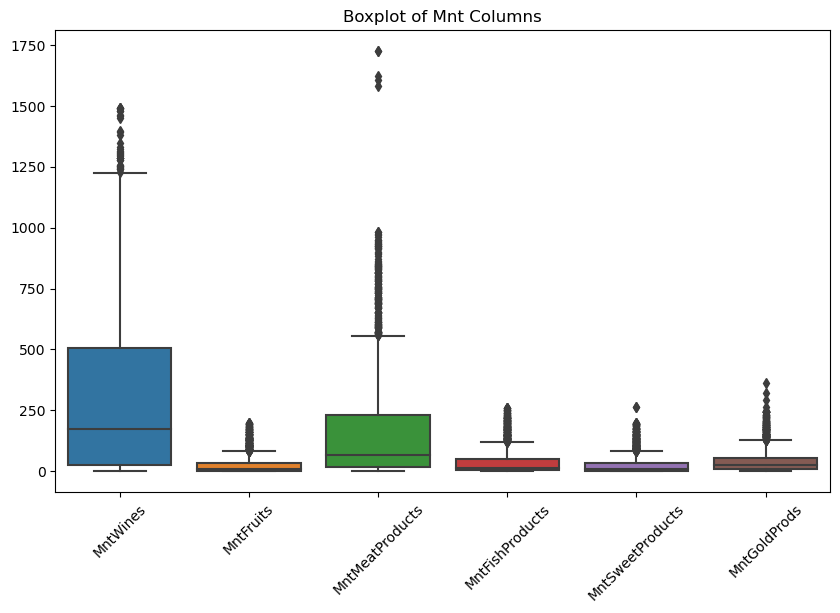

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.xticks(rotation=45)
plt.title("Boxplot of Mnt Columns")
plt.show()

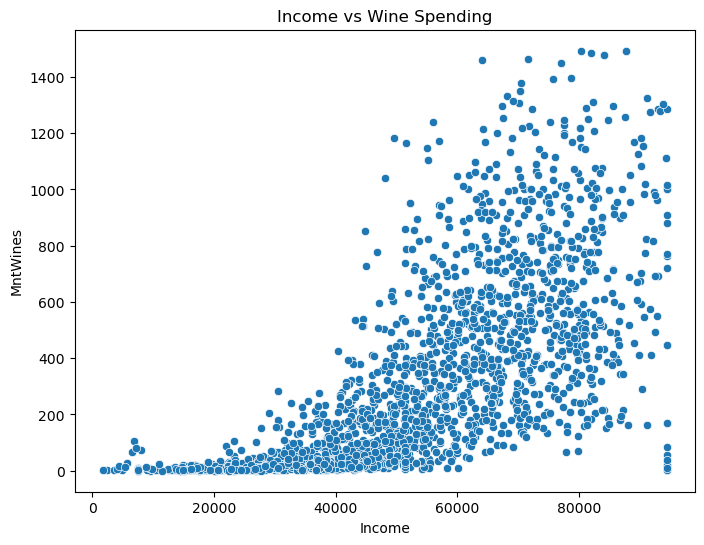

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntWines'])
plt.title("Income vs Wine Spending")
plt.show()

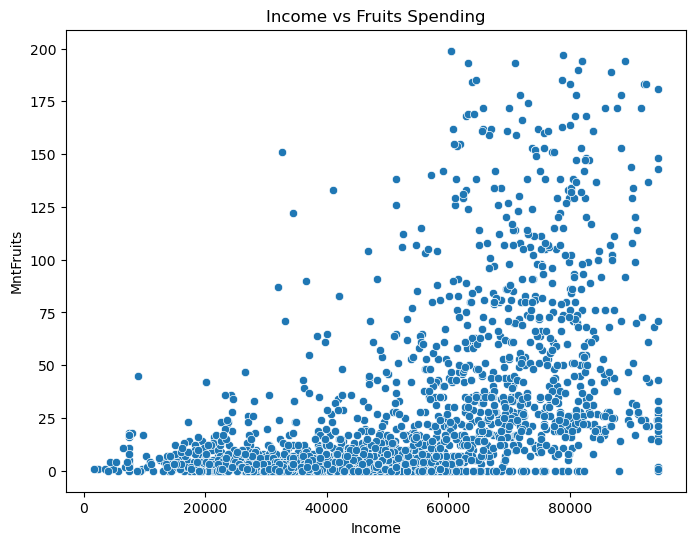

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntFruits'])
plt.title('Income vs Fruits Spending')
plt.show()

#### If high-income customers spend a lot, it makes sense.

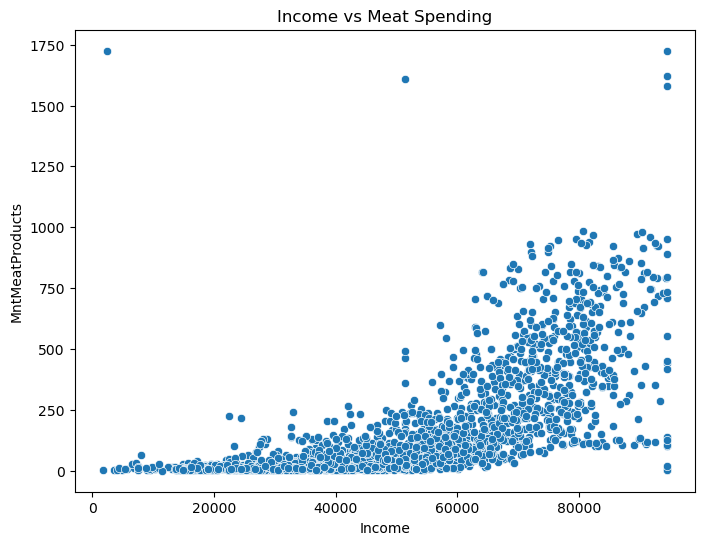

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntMeatProducts'])
plt.title('Income vs Meat Spending')
plt.show()

In [33]:
df[df['Income']<20000][['Income','MntMeatProducts']].sort_values(by='MntMeatProducts', ascending=False).head(10)

,Income,MntMeatProducts
21,2447.0,1725
1042,8028.0,66
879,17117.0,38
1806,7144.0,33
1725,16653.0,31
972,15716.0,30
326,14849.0,28
843,19419.0,28
1328,6560.0,26
2230,11012.0,26


In [34]:
df['MntMeatProducts'].quantile([0.90, 0.95, 0.99])

0.90    498.4
0.95    687.4
0.99    915.0
Name: MntMeatProducts, dtype: float64

- 90% of customers spend less than 498.4 on meat.
- 95% of customers spend less than 687.4 on meat.
- 99% of customers spend less than 915.0 on meat.
- Any value above 915.0 is in the top 1% (extreme spending).

In [35]:
df[df['MntMeatProducts']>915][['Income','MntMeatProducts']]

,Income,MntMeatProducts
21,2447.00,1725
76,75251.00,925
126,79607.00,951
140,92859.00,921
164,94440.32,1582
456,89572.00,974
546,85620.00,925
561,81741.00,940
687,94440.32,1622
845,81205.00,929


In [36]:
y = df.loc[21,['Income']]

In [37]:
y

Income    2447.0
Name: 21, dtype: object

In [38]:
x = df.loc[21, ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

In [39]:
print(x)

MntWines               1
MntFruits              1
MntMeatProducts     1725
MntFishProducts        1
MntSweetProducts       1
MntGoldProds           1
Name: 21, dtype: object


In [40]:
z = x.sum()

In [41]:
z

1730

In [42]:
(z/y)*100

Income    70.698815
Name: 21, dtype: object

#### This means they spend 71% of their income, which is still very high but not impossible.

In [43]:
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])


In [44]:
df['Spending_to_Income'] = df['Total_Spending'] / df['Income']

In [45]:
df[df['Spending_to_Income'] > 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Spending_to_Income


In [46]:
df[df['Spending_to_Income']>0.5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Spending_to_Income
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,0,0,0,0,0,3,11,0,1730,0.706988


#### No one is even spending even 50% of their income except ID(5376)

In [47]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Spending_to_Income
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,0.027813
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,0.000583
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,0.010836
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,0.001989
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,0.007239


### Exploratory Data Analysis (EDA)

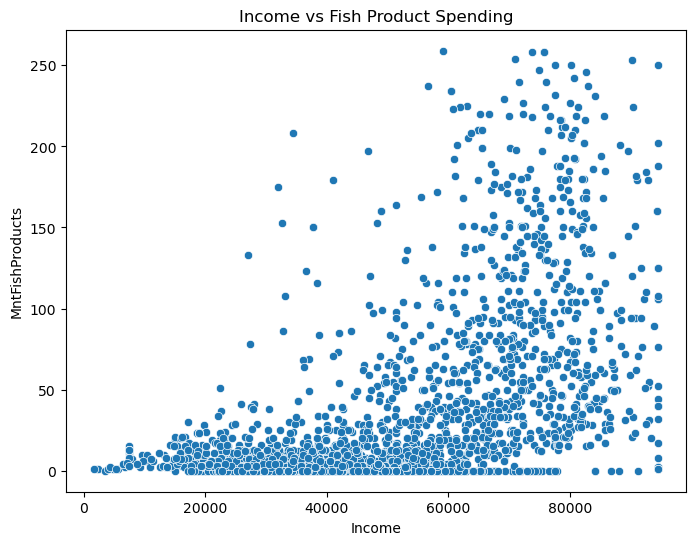

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntFishProducts'])
plt.title("Income vs Fish Product Spending")
plt.show()

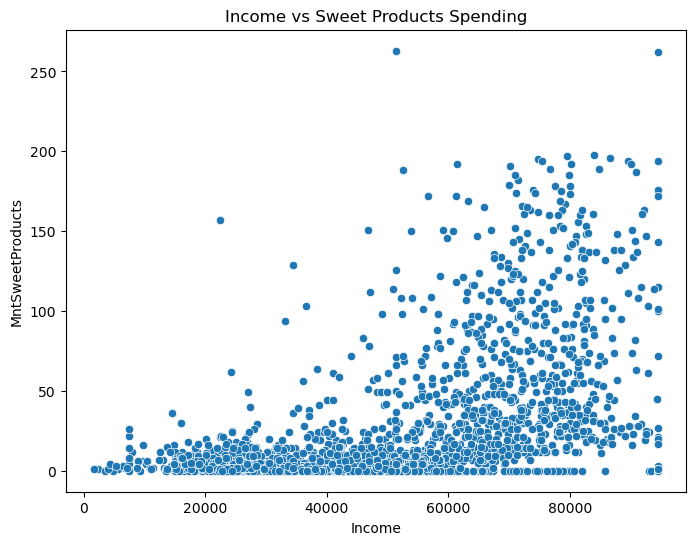

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntSweetProducts'])
plt.title("Income vs Sweet Products Spending")
plt.show()

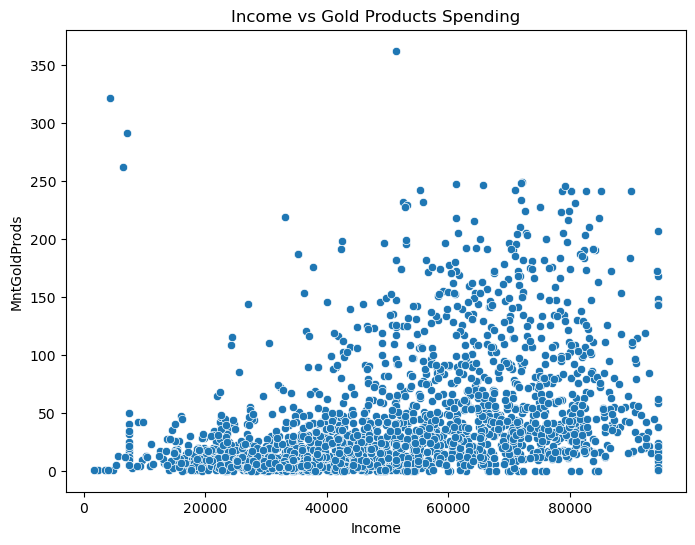

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntGoldProds'])
plt.title("Income vs Gold Products Spending")
plt.show()

#### If high-income customers spend a lot, it makes sense.

In [51]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Spending', 'Spending_to_Income'],
      dtype='object')

### Which product category (Wines, Meat, Fish, etc.) is the most popular?

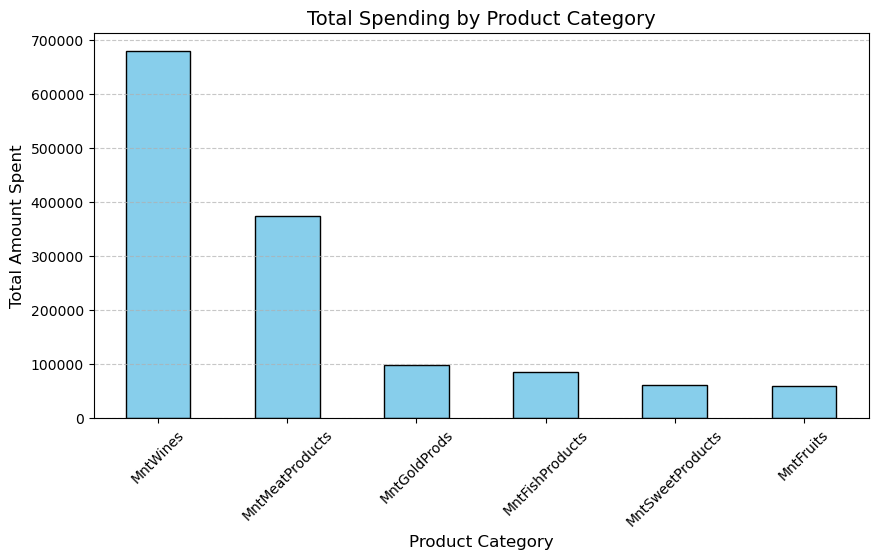

In [52]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total spending per category
total_spending = df[product_cols].sum()

# Plot total spending for each category
plt.figure(figsize=(10, 5))
total_spending.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Total Spending by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Amount Spent", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### MntWines and MntMeatProducts  have the highest spending.

### Are there customers with very high spending despite low income?

In [53]:
df['Total_Spending_axis_1'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Spending_Ratio_y'] = df['Total_Spending_axis_1'] / df['Income']
low_income = df['Income']<df['Income'].quantile(0.25)
high_spending = df['Total_Spending_axis_1']>df['Total_Spending_axis_1'].quantile(0.75)
high_spending_low_income = df[low_income & high_spending]
print(high_spending_low_income[['ID','Income','Total_Spending_axis_1','Spending_Ratio_y']])

      ID  Income  Total_Spending_axis_1  Spending_Ratio_y
21  5376  2447.0                   1730          0.706988


#### Only one customer with ID 5376 is spending 71% of its income.

### How many customers responded to at least one campaign?

In [54]:
df['Total_Responses'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']].sum(axis=1)
customer_responded = df[df['Total_Responses']>0]
print(f'Customers responded to at least one campaign:',len(customer_responded))

Customers responded to at least one campaign: 462


#### 462 customers responded to at least one campaign

### Which campaigns were most successful?

In [55]:
campaign_success = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']].sum()
print("Campaign Success Counts:\n", campaign_success)

# Find the most successful campaign
most_successful = campaign_success.idxmax()
print("\nMost successful campaign:", most_successful)

Campaign Success Counts:
 AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    162
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

Most successful campaign: AcceptedCmp4


#### AcceptedCmp4 was the most successful campaign

###  Are customers who buy more also more likely to accept a campaign?

In [56]:
correlation = df[['Total_Spending_axis_1', 'Total_Responses']].corr()
print("Correlation between Spending and Campaign Acceptance:\n", correlation)

Correlation between Spending and Campaign Acceptance:
                        Total_Spending_axis_1  Total_Responses
Total_Spending_axis_1               1.000000         0.458999
Total_Responses                     0.458999         1.000000


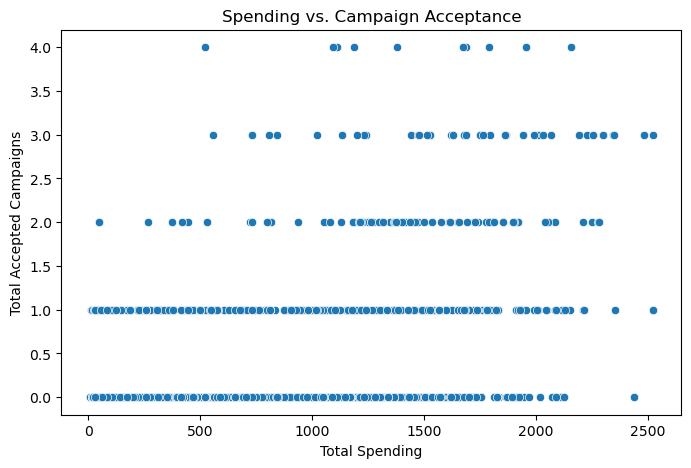

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Total_Spending_axis_1'], y=df['Total_Responses'])
plt.xlabel("Total Spending")
plt.ylabel("Total Accepted Campaigns")
plt.title("Spending vs. Campaign Acceptance")
plt.show()

A moderate positive relationship between total spending and campaign acceptance. This means:

- Customers who spend more tend to accept more campaigns.

- However, it's not a very strong correlation, meaning other factors also influence campaign acceptance.

### Are older customers spending differently than younger ones?

In [58]:
# Step 1: Calculate Age
df['Age'] = 2025 - df['Year_Birth']  

# Step 2: Create Age Groups
bins = [0, 35, 55, df['Age'].max()]
labels = ['Young (≤35)', 'Middle-aged (36-55)', 'Senior (≥56)']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Step 3: Compare Spending Across Age Groups
age_spending = df.groupby('Age_Group')['Total_Spending_axis_1'].mean()
print("Average spending by age group:\n", age_spending)

Average spending by age group:
 Age_Group
Young (≤35)            810.573770
Middle-aged (36-55)    526.194016
Senior (≥56)           675.872321
Name: Total_Spending_axis_1, dtype: float64


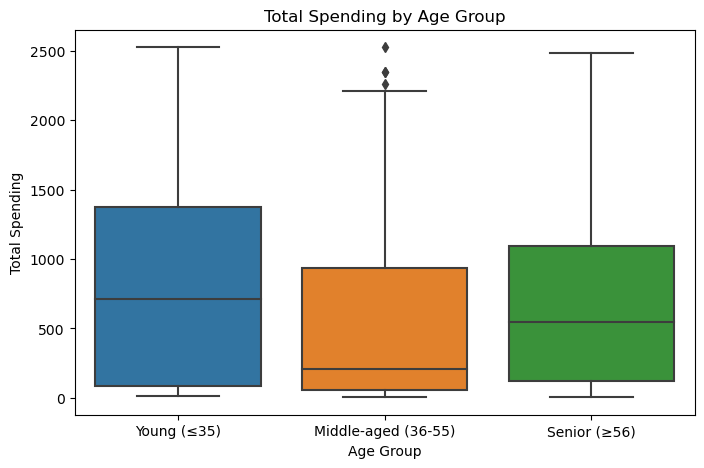

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Age_Group'], y=df['Total_Spending_axis_1'])
plt.xlabel("Age Group")
plt.ylabel("Total Spending")
plt.title("Total Spending by Age Group")
plt.show()

#### Young ones are spending more than Middle-aged and senior

### Is there a relationship between marital status and spending habits?

In [60]:
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [61]:
marital_spending = df.groupby('Marital_Status')['Total_Spending_axis_1'].mean()
print("Average spending by marital status:\n", marital_spending)

Average spending by marital status:
 Marital_Status
Absurd      1192.500000
Alone        256.666667
Divorced     612.991342
Married      590.802083
Single       607.703549
Together     606.238342
Widow        738.818182
YOLO         424.000000
Name: Total_Spending_axis_1, dtype: float64


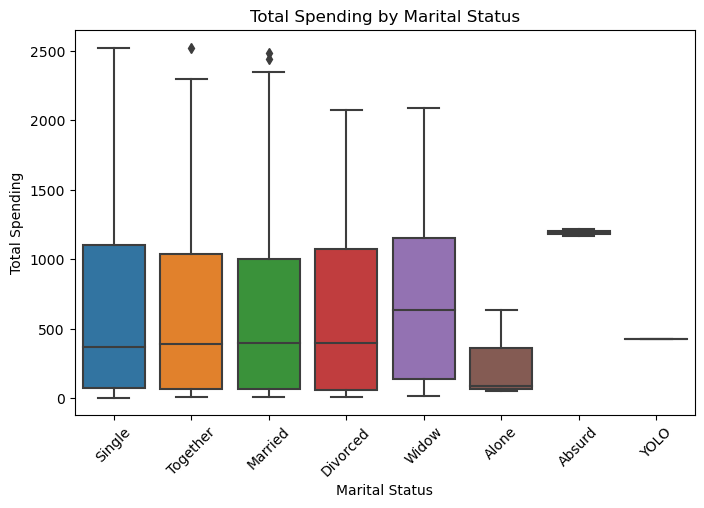

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Marital_Status'], y=df['Total_Spending_axis_1'])
plt.xlabel("Marital Status")
plt.ylabel("Total Spending")
plt.title("Total Spending by Marital Status")
plt.xticks(rotation=45)
plt.show()

#### Single are spending more

### Key Insights from Customer Personality Analysis

1️⃣ **General Spending Trends**
- The average spending per customer varies significantly, with some customers spending a large portion of their income.
- Wines are the most popular product category, followed by Meat and Fish purchases.
- A small group of high-income customers contributes to the majority of total spending, while some low-income customers exhibit unexpectedly high spending behavior.

2️⃣ **Income vs. Spending Behavior**
- Customers with higher incomes generally spend more, but there are exceptions where low-income customers spend disproportionately high amounts.
- A few customers have zero or very low income but high spending, which may indicate data inconsistencies or alternative income sources.
- The spending-to-income ratio helps identify over-spenders, who might be spending more than they can afford.

3️⃣ **Campaign Effectiveness & Customer Engagement**
- Campaign response analysis shows that some campaigns were significantly more successful than others.
- 462 customers responded to at least one campaign
- Most successful campaign: AcceptedCmp4
- A moderate positive relationship between total spending and campaign acceptance. This means:

    - Customers who spend more tend to accept more campaigns.

    - However, it's not a very strong correlation, meaning other factors also influence campaign acceptance.

4️⃣ **Age & Marital Status Influence on Spending**
- Young ones are spending more than Middle-aged and senior
- Single are spending more